In [1]:
#copied from hmmlearn examples # 2

"""
Gaussian HMM of stock data
--------------------------
This script shows how to use Gaussian HMM on stock price data from
Yahoo! finance. For more information on how to visualize stock prices
with matplotlib, please refer to ``date_demo1.py`` of matplotlib.
"""

%matplotlib inline
import matplotlib.pylab
from __future__ import print_function
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
from pandas_datareader import data as pdr
from hmmlearn.hmm import GaussianHMM

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

fitting to HMM and decoding ...done
Transition matrix
[[  7.28296688e-01   1.88697133e-02   2.44897517e-03   1.60303643e-01
    2.05179810e-14   9.00809806e-02]
 [  5.60983484e-02   5.67344292e-01   4.28155080e-26   3.45948767e-01
    2.40647534e-02   6.54383844e-03]
 [  6.83926250e-11   7.72487573e-31   9.78376075e-01   1.79772197e-03
    1.98262025e-02   2.31782636e-17]
 [  2.10679905e-01   1.42678734e-01   1.15875782e-10   6.13404396e-01
    5.13498982e-03   2.81019749e-02]
 [  6.11918129e-42   3.21351305e-01   2.68764592e-01   6.35833608e-11
    4.09884102e-01   6.66238117e-60]
 [  1.43228118e-01   2.81241083e-02   4.62908760e-31   9.82071316e-02
    7.19340342e-04   7.29721302e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  1.02407630e-02   5.53182708e+07]
var =  [  1.23269743e-01   6.86686809e+13]

1th hidden state
mean =  [  4.14320814e-02   1.15606093e+08]
var =  [  3.07904144e-01   8.93485481e+14]

2th hidden state
mean =  [  3.54917518e-02   4.96773826e

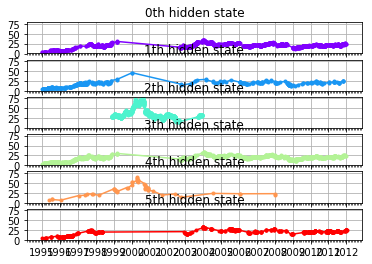

In [2]:
# Get quotes from Yahoo! finance
quotes = pdr.get_data_yahoo('INTC', start='1995-01-01', end='2012-01-06')

# Unpack quotes
dates = quotes.index #np.array([q[0] for q in quotes], dtype=int)
close_v = quotes.Close #np.array([q[2] for q in quotes])
volume = quotes.Volume #np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]
volume = volume[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

###############################################################################
# Print trained parameters and plot
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()